In [76]:
# Import Library
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
#Import Data
df_FW = pd.read_csv(r'C:\Users\JayNB\OneDrive\เดสก์ท็อป\NIDA\ML_QUIZ\log2.csv')

In [42]:
# สร้างตัวแปรทำนาย (X: Independents) และตัวแปรเป้าหมาย (Y: Target label) สำหรับ model

X = df_FW[["Destination Port","NAT Source Port","NAT Destination Port", "Bytes","pkts_sent","pkts_received","Elapsed Time (sec)"]]
Y = df_FW['Action']

In [43]:
# Split Train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=55)

DecisionTreeClassifier, KNeighborsClassifier and  RandomForestClassifier with pipeline

In [86]:
# List model DecisionTreeClassifier, KNeighborsClassifier and  RandomForestClassifier with pipeline
model_list = {'Tree': DecisionTreeClassifier(),
              'KNN' : KNeighborsClassifier(n_neighbors = 1),
              'RF': RandomForestClassifier()}

In [87]:
# Run model 
for key in model_list.keys():
    model = model_list[key]
    pipe=make_pipeline(StandardScaler(), model)
    accuracy= cross_val_score(pipe, X_train, y_train, cv=10)
    pipe.fit(X_train, y_train)
    predicted = pipe.predict(X_test)
    print (key)
    print (metrics.classification_report(y_test, predicted))
    print ('#########################################################')


    
    

Tree
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.82      0.74      0.78        19

    accuracy                           1.00     19660
   macro avg       0.95      0.93      0.94     19660
weighted avg       1.00      1.00      1.00     19660

#########################################################
KNN
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.67      0.74      0.70        19

    accuracy                           1.00     19660
   macro avg       0.92      0.93      0.92     19660
weighted avg       1.00      1.00      1.00     19660

#########################################################
RF
  

4.XGBOOST 

In [15]:
#แปลง Data เป็น INT เพื่อนำเข้า Model XGBOOST
X_XG = df_FW[["Destination Port","NAT Source Port","NAT Destination Port", "Bytes","pkts_sent","Elapsed Time (sec)"]]

df_FW['Action'] = df_FW.Action.replace(['allow', 'drop', 'deny', 'reset-both'],['1','2','3','4'])
Y_XG = df_FW[['Action']]

In [18]:
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


# Encode y to numeric
y_encoded = OrdinalEncoder().fit_transform(Y_XG)
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')
   
# Split the data
X_train_XG, X_test_XG, y_train_XG, y_test_XG = train_test_split(X_XG, y_encoded, random_state=37, stratify=y_encoded)


In [28]:

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_XG, y_train_XG)


# Make predictions on the test set
y_pred_XG = xgb_classifier.predict(X_test_XG)

# Generate the classification report
report = classification_report(y_test_XG, y_pred_XG)
print(classification_report(y_test_XG, y_pred_XG))
print('\n')
print(confusion_matrix(y_test_XG, y_pred_XG))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9410
         1.0       1.00      1.00      1.00      3213
         2.0       1.00      1.00      1.00      3747
         3.0       1.00      0.85      0.92        13

    accuracy                           1.00     16383
   macro avg       1.00      0.96      0.98     16383
weighted avg       1.00      1.00      1.00     16383



[[9409    0    1    0]
 [   0 3213    0    0]
 [   0    9 3738    0]
 [   0    0    2   11]]


In [47]:
# แสดงจำนวนก่อนสุ่ม OverSampling
("Before OverSampling, counts 'allow': {}".format(sum(y_train =='allow')))
print("Before OverSampling, counts 'deny': {} ".format(sum(y_train == 'deny')))
print("Before OverSampling, counts 'drop': {} ".format(sum(y_train == 'drop')))
print("Before OverSampling, counts 'reset-both': {} \n".format(sum(y_train == 'reset-both')))

Before OverSampling, counts 'allow': 26262
Before OverSampling, counts 'deny': 10535 
Before OverSampling, counts 'drop': 9040 
Before OverSampling, counts 'reset-both': 35 



Balance Data

In [48]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state = 37).fit_resample(X_train, y_train)

In [96]:
# แสดงจำนวนหลังสุ่ม OverSampling

print("After OverSampling, counts 'allow': {}".format(sum(y_resampled == 'allow')))
print("After OverSampling, counts 'deny': {} ".format(sum(y_resampled == 'deny')))
print("After OverSampling, counts 'drop': {} ".format(sum(y_resampled == 'drop')))
print("After OverSampling, counts 'reset-both': {} \n".format(sum(y_resampled == 'reset-both')))

After OverSampling, counts 'allow': 26262
After OverSampling, counts 'deny': 26262 
After OverSampling, counts 'drop': 26262 
After OverSampling, counts 'reset-both': 26262 



DecisionTree

In [146]:
tree = make_pipeline(StandardScaler(), 
                    GridSearchCV(DecisionTreeClassifier(),
                                 param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                                             'ccp_alpha': [0.0,0.1, .01, .001],
                                             'max_depth' : range(1,15),
                                            'criterion' :['gini', 'entropy']
                                            },
                                            cv=5,
                                            refit=True))

tree.fit(X_resampled,y_resampled)
tree_pred = tree.predict(X_test)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))
tree_acc = accuracy_score(y_test,tree_pred)



[[11377     1     0     0]
 [    0  4277    12   163]
 [    0     0  3811     0]
 [    0     2     0    17]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      0.96      0.98      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.09      0.89      0.17        19

    accuracy                           0.99     19660
   macro avg       0.77      0.96      0.79     19660
weighted avg       1.00      0.99      0.99     19660



In [147]:
print(f1_score(y_test,tree_pred, average='weighted'))
print(precision_score(y_test,tree_pred ,average='weighted'))
print(recall_score(y_test,tree_pred ,average='weighted'))
print(accuracy_score(y_test,tree_pred ))

0.994252418545176
0.9983576577034914
0.9909460834181079
0.9909460834181079


KNN

In [150]:
knn = make_pipeline(StandardScaler(), 
                    GridSearchCV(KNeighborsClassifier(),
                                 param_grid={'n_neighbors': range(1,10),
                                             'weights':['uniform', 'distance'],
                                             'leaf_size' : range(28,32)
                                            },
                                            cv=5,
                                            refit=True))

knn.fit(X_resampled,y_resampled)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
knn_acc = accuracy_score(y_test,knn_pred)



              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      0.98      0.99      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.19      0.95      0.31        19

    accuracy                           0.99     19660
   macro avg       0.80      0.98      0.83     19660
weighted avg       1.00      0.99      1.00     19660

[[11361     6     0    11]
 [    2  4371    12    67]
 [    0     0  3811     0]
 [    0     1     0    18]]


In [151]:
print(f1_score(y_test,knn_pred, average='weighted'))
print(precision_score(y_test,knn_pred ,average='weighted'))
print(recall_score(y_test,knn_pred ,average='weighted'))
print(accuracy_score(y_test,knn_pred ))

0.9962910604496742
0.9981423808615945
0.9949643947100713
0.9949643947100713


RandomForest

In [124]:
rf = RandomForestClassifier()
rf = make_pipeline(StandardScaler(), 
                    GridSearchCV(RandomForestClassifier(),
                                 param_grid = {
                                                'max_features': [4,6,8],
                                                'min_samples_leaf': [1,3,5],
                                                'min_samples_split': [2,5,12],
                                                'n_estimators': [10,100,300,500]
                                                },
                                            cv=5,
                                            refit=True))

rf.fit(X_resampled,y_resampled)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
rf_acc = accuracy_score(y_test,rf_pred)
print(rf_acc)

[[11377     1     0     0]
 [    0  4407    12    33]
 [    0     0  3811     0]
 [    0     3     0    16]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      0.99      0.99      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.33      0.84      0.47        19

    accuracy                           1.00     19660
   macro avg       0.83      0.96      0.87     19660
weighted avg       1.00      1.00      1.00     19660

0.9975076297049847


In [144]:
print(f1_score(y_test,rf_pred, average='weighted'))
print(precision_score(y_test,rf_pred ,average='weighted'))
print(recall_score(y_test,rf_pred ,average='weighted'))
print(accuracy_score(y_test,rf_pred ))

0.9979062690562563
0.9985353290238393
0.9975076297049847
0.9975076297049847


XGBOOST

In [171]:
from imblearn.over_sampling import SMOTE
X_resampled_XG, y_resampled_XG = SMOTE(random_state = 37).fit_resample(X_train_XG, y_train_XG)
xg = make_pipeline(StandardScaler(), 
                   xgb.XGBClassifier())

xg.fit(X_resampled_XG,y_resampled_XG)
xg_pred = xg.predict(X_test_XG)
print(confusion_matrix(y_test_XG,xg_pred))
print(classification_report(y_test_XG,xg_pred))
xg_acc = accuracy_score(y_test_XG,xg_pred)



[[9409    0    1    0]
 [   0 3213    0    0]
 [   0    9 3692   46]
 [   0    0    1   12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9410
         1.0       1.00      1.00      1.00      3213
         2.0       1.00      0.99      0.99      3747
         3.0       0.21      0.92      0.34        13

    accuracy                           1.00     16383
   macro avg       0.80      0.98      0.83     16383
weighted avg       1.00      1.00      1.00     16383



In [168]:
print(f1_score(y_test_XG,xg_pred, average='weighted'))
print(precision_score(y_test_XG,xg_pred ,average='weighted'))
print(recall_score(y_test_XG,xg_pred ,average='weighted'))
print(accuracy_score(y_test_XG,xg_pred ))

0.9974179110312863
0.9986990233568848
0.9965207837392419
0.9965207837392419


Plot ROC Curve

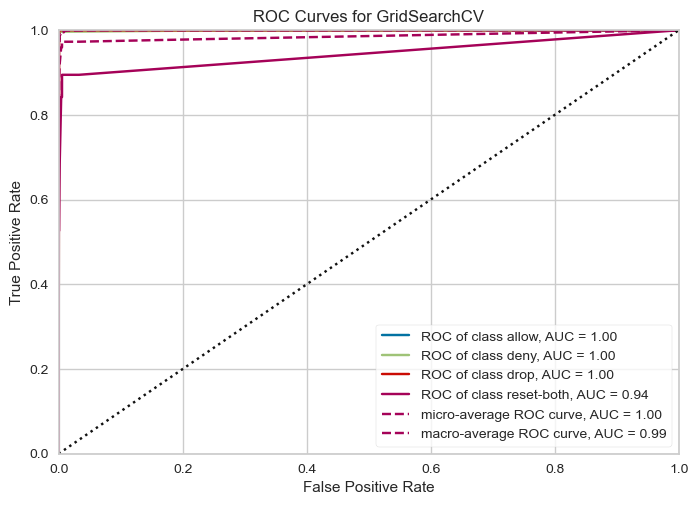

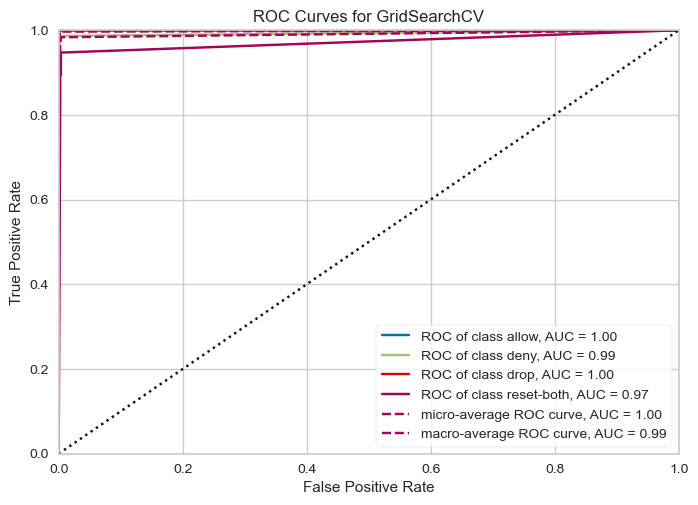

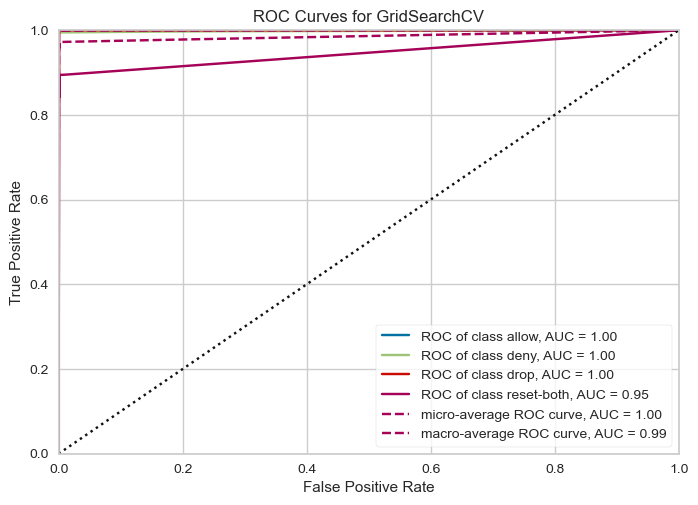

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('gridsearchcv',
                                  GridSearchCV(cv=5,
                                               estimator=RandomForestClassifier(),
                                               param_grid={'max_features': [4,
                                                                            6],
                                                           'min_samples_leaf': [1,
                                                                                3],
                                                           'min_samples_split': [2,
                                                                                 5],
                                                           'n_estimators': [10,
                                                                            100]}))]))

In [172]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(estimator, X_train_XG, y_train_XG, X_test_XG, y_test_XG):
  visualizer = ROCAUC(estimator)
  visualizer.fit(X_train_XG, y_train_XG)
  visualizer.score(X_test_XG, y_test_XG)
  visualizer.show()
  
  return visualizer
plot_ROC_curve(tree,X_resampled, y_resampled, X_test, y_test)
plot_ROC_curve(knn,X_resampled, y_resampled, X_test, y_test)
plot_ROC_curve(rf,X_resampled, y_resampled, X_test, y_test)


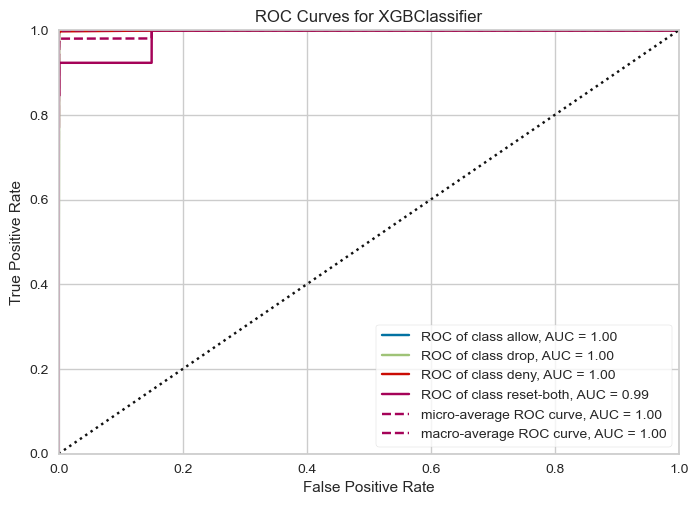

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'allow', 1: 'drop', 2: 'deny', 3: 'reset-both'},
       estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('xgbclassifier',
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,...
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                objective='multi:softprob',
                                                predictor=None, ...))]))

In [159]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(estimator, X_train_XG, y_train_XG, X_test_XG, y_test_XG):
  visualizer = ROCAUC(estimator, encoder={0: 'allow', 
                                    1: 'drop', 
                                    2: 'deny',
                                    3: 'reset-both'})
  visualizer.fit(X_train_XG, y_train_XG)
  visualizer.score(X_test_XG, y_test_XG)
  visualizer.show()
  
  return visualizer

plot_ROC_curve(xg,X_resampled_XG, y_resampled_XG, X_test_XG, y_test_XG)